In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
#load dataset into the notebook
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#get all coumns in small caps
data.columns.str.lower()

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [4]:
#lets look the mean of survival using gender
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [5]:
#here we see that the survival rate for females was hire than that of men
#this shows that about 20% of men survived and 75% of females survived
#lets group them further by class
data.groupby(['Sex','Pclass'])[['Survived']].mean().unstack()

Survived                    
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [6]:
# this shows tha most females that survived outcomes survival of mens from both
# first , second and third classses
# It also show that most of people in the first class 
# survival rate was hire than the restt
# the survival reduces as you move from first class to third class
#the above can also be written using pivot_table function as shown below
data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [7]:
#let then check the survival using 
#we will group into different ages i.e 0 to 18 , 18 to 35  and 35 to 80
age = pd.cut(data['Age'], [0, 18,35, 80])
data.pivot_table('Survived', ['Sex', age], 'Pclass').unstack()

Pclass         1                           2                             3  \
Age      (0, 18]  (18, 35]  (35, 80] (0, 18]  (18, 35]  (35, 80]   (0, 18]   
Sex                                                                          
female  0.909091  0.972222  0.973684     1.0  0.925000  0.850000  0.511628   
male    0.800000  0.500000  0.318182     0.6  0.074074  0.066667  0.215686   

Pclass                     
Age     (18, 35] (35, 80]  
Sex                        
female  0.500000   0.2000  
male    0.155844   0.0625

In [8]:
#The results also shows similar results to girl child in the first class
#as the survival as also in over 90% unlike boychild
#but for boychild in the ages between 0-18 their survival was abit high
#it also shows people of age 35 to 80 in both genders in the third class 
#did not survived many like for mens its alsmost everyone died

In [9]:
#lets now compute the total for each class survival using margin keyword in the pivod table function
data.pivot_table('Survived', index='Sex', columns='Pclass', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [10]:
#the females were the ost survived unlike males
#First class people survived more than the others members
#the rate of survival generally was abit low about 40%

## Analysis of The Dataset

In [11]:
import copy
import warnings
warnings.filterwarnings('ignore')

## Description for Columns in the dataset
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

### This May also help : https://data.world/nrippner/titanic-disaster-dataset

In [12]:
# create new df
df = copy.copy(data)

In [13]:
df.shape

(891, 12)

In [14]:
#check sample data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#checking information from the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Findings..
 - Age , Cabin has nulls data
 - It has 891 entries
 - has fields with object data type ...Need to be cleaned to correct types
 - 12 columns are in the df

In [16]:
#checking stats information about the numericals
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Findings ..
 -  Looking on real Data ..we have columns like Survived , Age , sibsp , parch , fare
 -  The Age , sibsp , parch , fare seems to be unevenly distributed by checking on quartiles 

## Checking THe Data Quality

In [17]:
#We gonna check the percentage of nulls in each column field.
nulls_sums = df.isna().sum()
percent_nulls = nulls_sums /(len(df))
percent_nulls

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Findings ..
 - Cabin has 77.1% , Age has 19.7% and Embarked has 0.225% nulss
 - Since Cabin Has very high amount of nulls , i will drop the column n from the df
 - For Age  , I will use median to replace the nulls since it is not a good idea to remove this either row_wise or     column as it will affect the data greatly
 - For embarked i will drop the rows with nulls as they are small

In [18]:
#remove the cabin col
df.drop('Cabin' , axis = 1 , inplace = True)

In [19]:
#fill nulls with median or mean for age
age_median = df['Age'].median(skipna = True)
df['Age'].fillna(age_median, inplace = True)

In [20]:
#drop the rows with nulls for embarked
#will use boolean to filter out nulls
df =  df[df['Embarked'].isna() != True]

In [21]:
df.shape

(889, 11)

In [22]:
# create a copy of df 
df1 = df.copy()

In [23]:
df1.shape , df.shape

((889, 11), (889, 11))

## Detecting Outliers
 - Will Use boxplot

Text(0.5, 1.0, 'CHeck Parch outliers')

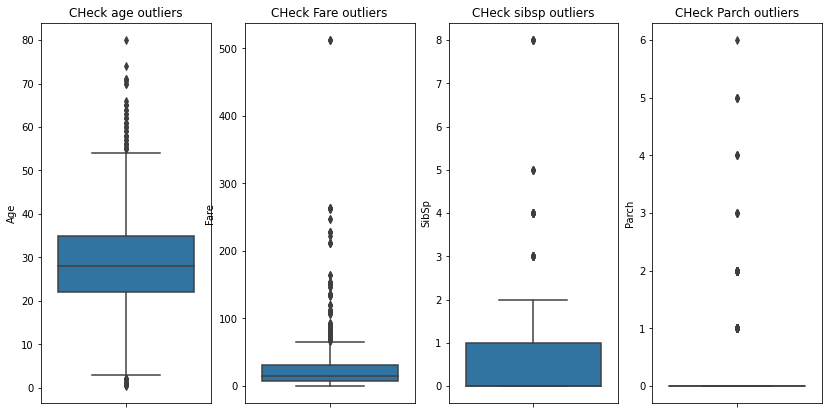

In [24]:
plt.figure(figsize = (14, 7))
# create a one row with for cols for four plots
plt.subplot(1,4,1)
# Draw for age
sns.boxplot(y= df['Age'])
plt.title("CHeck age outliers")


# for fare
plt.subplot(1,4,2)
sns.boxplot(y= df['Fare'])
plt.title("CHeck Fare outliers")

# siblings
plt.subplot(1,4,3)
sns.boxplot(y= df['SibSp'])
plt.title("CHeck sibsp outliers")

# for childres
plt.subplot(1,4,4)
sns.boxplot(y= df['Parch'])
plt.title("CHeck Parch outliers")

## Findings
 - From the above 4 attributes we get all has outliers ...as there are many whiskers outside range
 - Fare is the one with most outliers
 

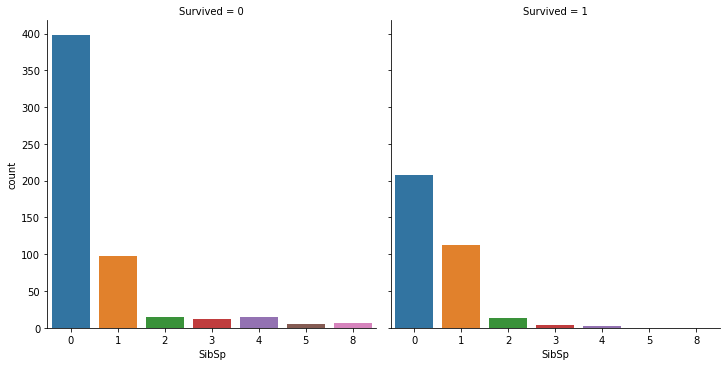

In [25]:
#Lets now check survival rate with regard to siblings 
sns.catplot(x = 'SibSp'  , col = "Survived"  , data = df , kind = 'count')

## Findings ...
 - Mostof who survived were those that were single siblings aboard
 - The rest many of then never survived

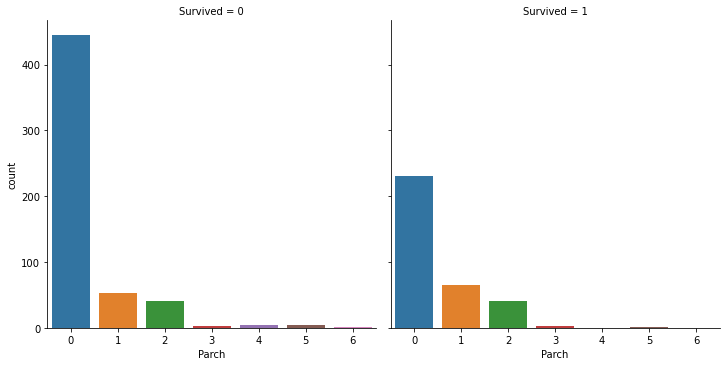

In [26]:
#Lets now check survival rate with regard to parents abord 
sns.catplot(x = 'Parch'  , col = "Survived"  , data = df , kind = 'count')

## Findings ...
 - Single parents also Survived most 

 - From The above two plots.
    **WE can conclude that parch and sibsp shows whether a sibling is accompanied by parent or not**
    
   - I will Merge the two cols labels(1 or 0) to see if a single person is with another one else

In [27]:
#if you add sibsp and parch and is over 0 , return 1 else zero
def checkAccopany(x):
    if (x['Parch'] + x['SibSp'] > 0):
        return 1
    else:
        return 0
    
# create the new merged col
df['is_Accompanied'] = df.apply(checkAccopany , axis = 1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_Accompanied
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


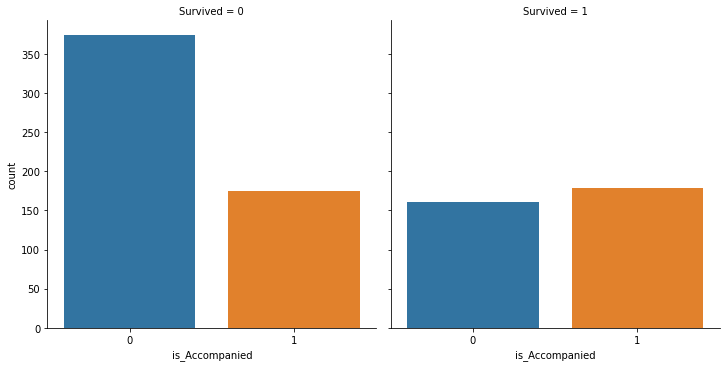

In [29]:
#use survival and new is_accompanied col to check 
sns.catplot(x = 'is_Accompanied'  , col = "Survived"  , data = df , kind = 'count')

## Findings 
 - Those who were not accompanied mostly perished more than those accompanied
 - Those who were accompanied survived more than the other ones.

Text(0.5, 1.0, 'Fare Distributiron')

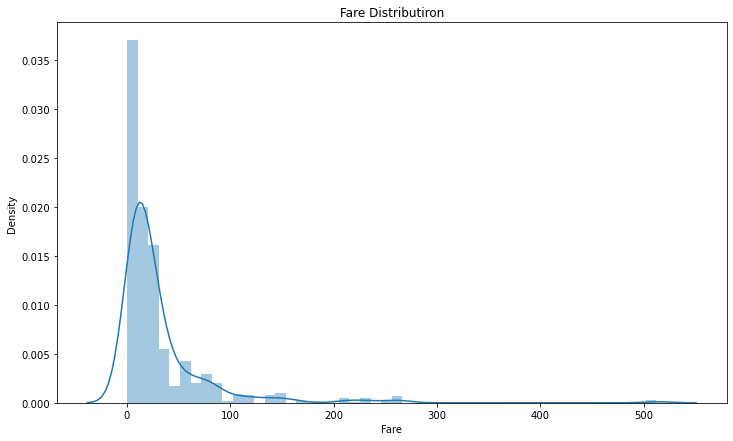

In [30]:
#now checking about fare..
#i will use distplot...shows distribution and histgrams combined
plt.figure(figsize = (12 , 7))
sns.distplot(df['Fare'])
plt.title("Fare Distributiron")

## Findings ...
-  The fare is more skewed to the right. (more data is on the right)
-  The skewness need to be removed... can use logs to standard it.

Text(0.5, 1.0, ' Logarithmic Fare Distributiron')

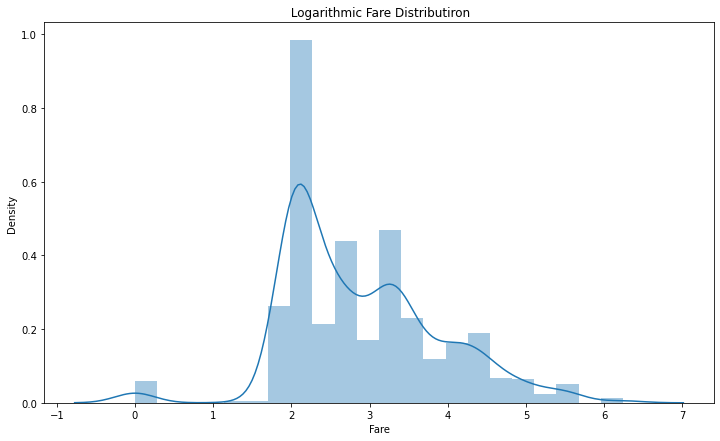

In [31]:
#using log function to try balance skewness
plt.figure(figsize = (12 , 7))
sns.distplot(df['Fare'].map(lambda x: np.log(x) if x >0 else 0))
plt.title(" Logarithmic Fare Distributiron")

## We have made the data be less skewed for uniformity..
- The fare column can now be replaced with log values since is more uniform

In [32]:
#perform logs to fare col
df['Fare'] = df['Fare'].map(lambda x: np.log(x) if x >0 else 0)

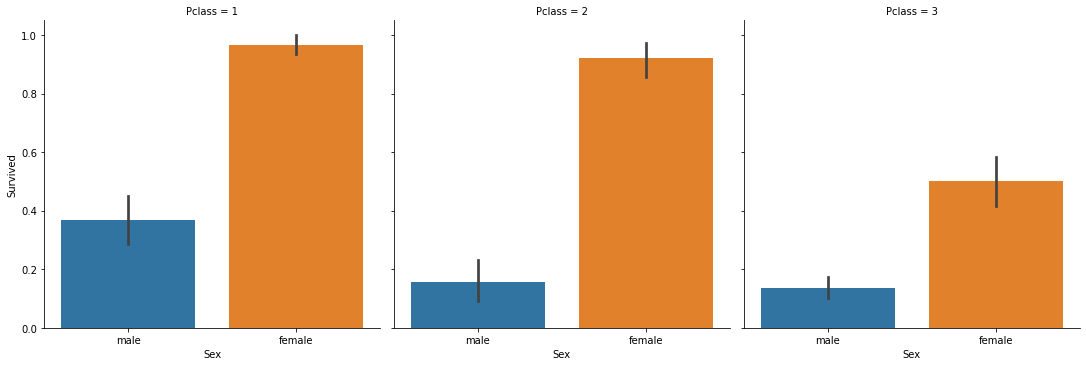

In [33]:
## LEts now check sex and class distribution using survival
 
sns.catplot(x = 'Sex'   ,y = "Survived"  , data = df , col = 'Pclass', kind = 'bar')

## Findings...
-  Females were likely to have survived most.
- Those in the first class also survived more

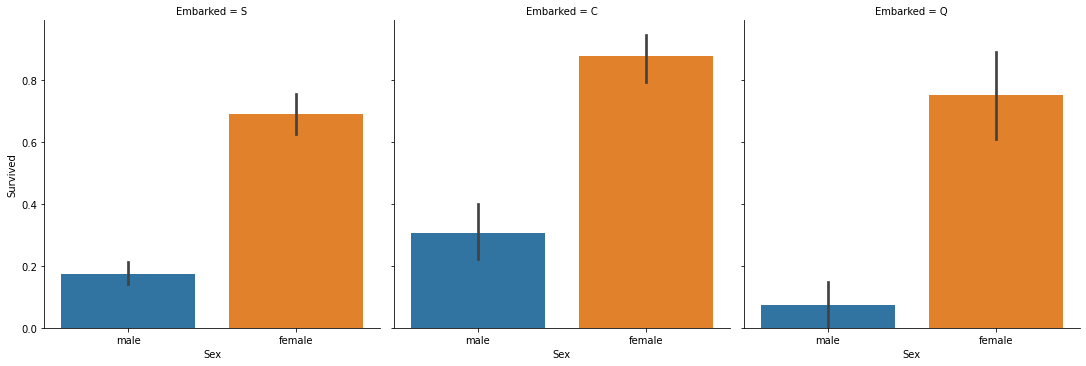

In [34]:
#using embarked
 
sns.catplot(x = 'Sex'   ,y = "Survived"  , data = df , col = 'Embarked', kind = 'bar')

## Findings ..
- Those who boarded from Port Label **C**  are likely to have Survived more than others

<AxesSubplot:xlabel='Age', ylabel='Density'>

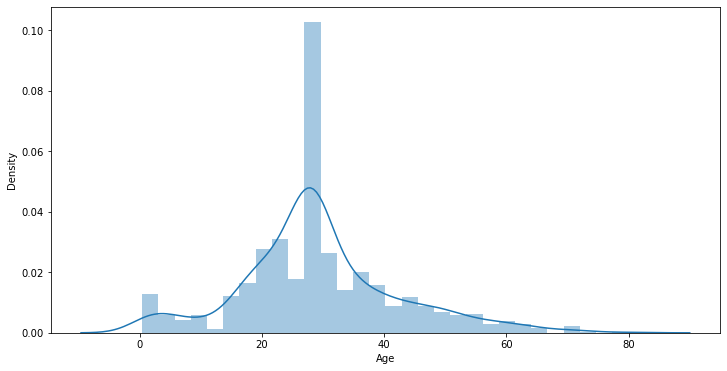

In [35]:
##Cecking Age survival rates
plt.figure(figsize = (12 , 6))
sns.distplot(df['Age'])

## Most of the people aboarded were likely  to be most of agegroup 20 --- 40

Text(0.5, 1.0, 'Distribution Of Survived')

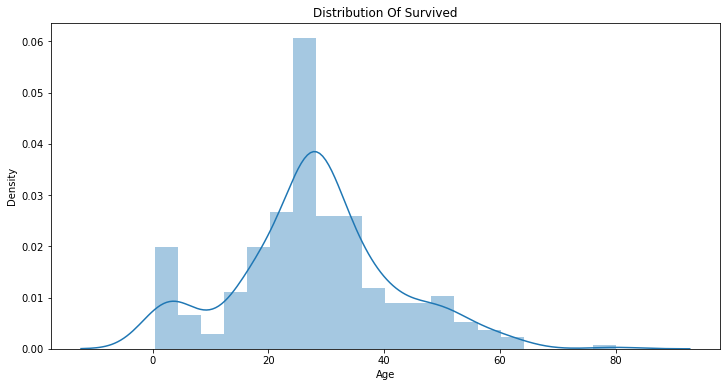

In [36]:
#Checking survival based on ages

# 1. Those who survived
plt.figure(figsize = (12 , 6))
sns.distplot(df[df['Survived'] == 1]['Age'])
plt.title("Distribution Of Survived")

## Those wilth less than 60 years were most likely to survive.
 - greater chances of survival was on btween 30 and 35 years

Text(0.5, 1.0, 'Distribution Of  who did not Survived')

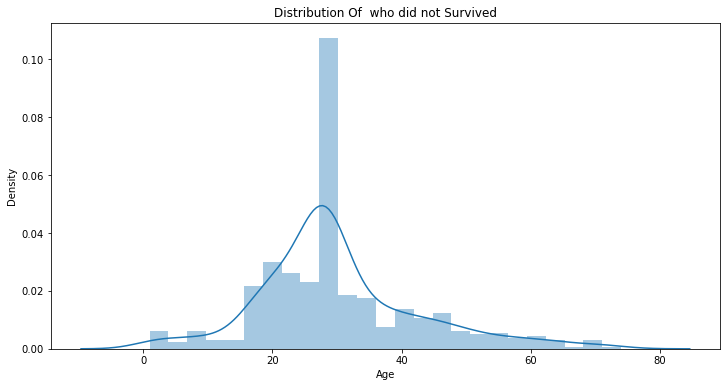

In [37]:
#Checking survival based on ages

# 1. Those who didn't survived
plt.figure(figsize = (12 , 6))
sns.distplot(df[df['Survived'] == 0]['Age'])
plt.title("Distribution Of  who did not Survived")

## AGed were likely not to survive.
 - Its skewed to left.. more of aged did not survive

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

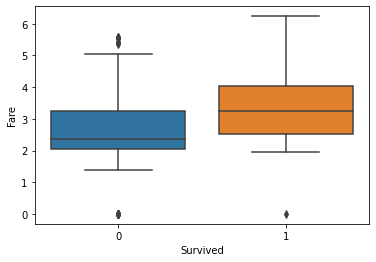

In [38]:
##Survival based on fare..
sns.boxplot(x = 'Survived'  , y = 'Fare' , data = df)

## __Most Survived are likely to have paid more fare.
-  Those who survived have a mean fare greater than non survived